In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
df = pd.read_csv('Social_Network_Ads.CSV')

In [3]:
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

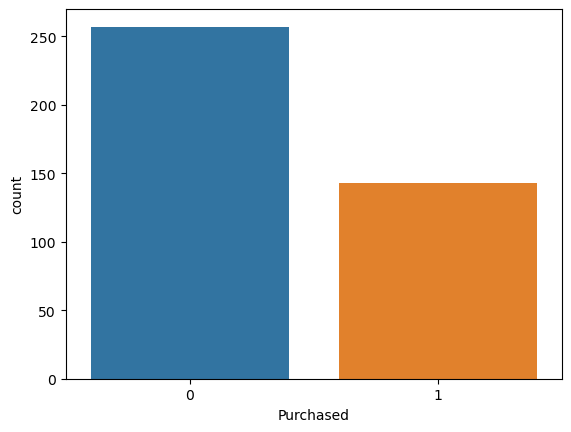

In [6]:
sns.countplot(data = df, x = 'Purchased')

In [7]:
def cat_to_num(value):
    if(value == 'Male'):
       return 1;
    elif(value == "Female"):
        return 0;
    else:
        pass

In [8]:
df['Gender'] = df['Gender'].apply(cat_to_num)

<Axes: >

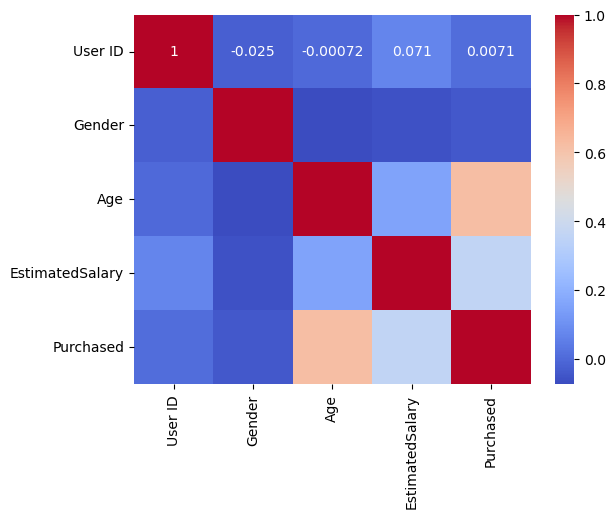

In [14]:
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm")

In [16]:
x = df[['Age','EstimatedSalary']]
y = df[['Purchased']]

In [19]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3, shuffle=True)

In [32]:
Model = LogisticRegression()
Model.fit(x_train,y_train)


C:\Users\heman\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
y_pred=Model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [35]:
y_test

,Purchased
162,0
2,0
323,1
232,1
10,0
...,...
368,0
225,0
255,1
6,0


<Axes: >

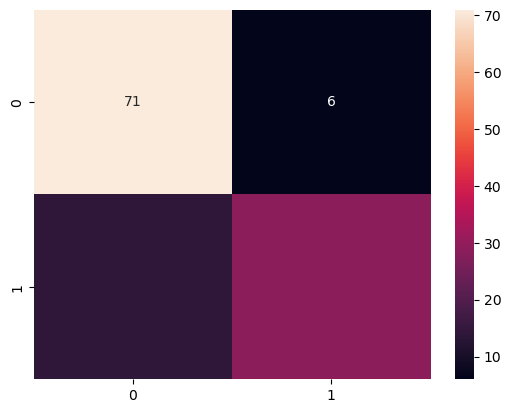

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True) 

In [41]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        77
           1       0.83      0.67      0.74        43

    accuracy                           0.83       120
   macro avg       0.83      0.80      0.81       120
weighted avg       0.83      0.83      0.83       120

